<a href="https://colab.research.google.com/github/wongzixu/MultiProcessing/blob/main/CEG5205_HW3_Hand_Gesture_Recognition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CEG5205 Lab 3: Basic of deep learning for IMU data analytics
Lab 3 introduces you the self-collected sensor dataset with some useful preprocessing and visualization methods, and explores the deep neural networks.

In [1]:
!unzip Lab3_dataset.zip

Archive:  Lab3_dataset.zip
   creating: Lab3_dataset/
  inflating: __MACOSX/._Lab3_dataset  
  inflating: Lab3_dataset/.DS_Store  
  inflating: __MACOSX/Lab3_dataset/._.DS_Store  
   creating: Lab3_dataset/label/
  inflating: __MACOSX/Lab3_dataset/._label  
   creating: Lab3_dataset/data/
  inflating: __MACOSX/Lab3_dataset/._data  
  inflating: Lab3_dataset/label/rosbag2_2023_02_11-09_34_34_label.csv  
  inflating: __MACOSX/Lab3_dataset/label/._rosbag2_2023_02_11-09_34_34_label.csv  
  inflating: Lab3_dataset/label/rosbag2_2023_02_27-14_50_04_label.csv  
  inflating: __MACOSX/Lab3_dataset/label/._rosbag2_2023_02_27-14_50_04_label.csv  
  inflating: Lab3_dataset/label/rosbag2_2023_02_27-14_52_01_label.csv  
  inflating: __MACOSX/Lab3_dataset/label/._rosbag2_2023_02_27-14_52_01_label.csv  
  inflating: Lab3_dataset/label/rosbag2_2023_03_02-06_00_21_label.csv  
  inflating: __MACOSX/Lab3_dataset/label/._rosbag2_2023_03_02-06_00_21_label.csv  
  inflating: Lab3_dataset/label/rosbag2_2023_0

## **Homework Requirements**


1.   Complete your project in the notebook ”CEG5205_Lab3.ipynb”;
2.   Implement your codes within ”TODO” and ”END OF YOUR CODE”, do NOT modify any codes outside the answer area;
3.   Make sure your codes clean, runnable and easily readable (add meaningful comments if needed);
4.   Write your answers in the given markdown cells, keep your answers clear and concise.


## **Submission** <font color=red> **(Deadline: Nov 15th, 11 PM)** </font>



*   Please submit a zip file to Canvas named as“HW_Lab3_YOUR STUDENT ID_YOUR NAME.zip”(e.g. “HW_Lab3_A1000000W_XXX XXX”), which includes:
*   The completed ”CEG5205_Lab3.ipynb” file,  which should be runnable without anyerrors;
*   Export a .pdf file named as “CEG5205_Lab3_ YOUR STUDENT ID_YOUR NAME.pdf”  ;
*   Put the figures you plot (if any) in the ” CEG5205_Lab3/figures” and  link them in the notebook correctly;
*   Do NOT upload any saved models, i.e., the checkpoint files.







**Lab3 is an individual project**, <font color=red> **do NOT share your solutions with others.**</font> **Plagiarism will be severely punished.**

## Loading packages
Please install the packages listed below if you haven't done so. To avoid unnecessary trouble while reproducing your code, please install the required packages version.

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

## Smart glove sensor dataset
The glove is equipped with three IMUs, and each gesture was recorded for approximately 3 seconds. The recorded data includes the linear acceleration and angular velocity in the XYZ directions, as well as the orientation in the XYZW dimensions. Moreover, the TFs between the index finger, middle finger, and palm have been captured.

## 1. Load and visualize IMU data (10 Points)
In task 1, the provided IMU data set have 810 samples with 45 channels you need to load all data first. (Note: each data sample don’t have same time length; the first column of data is the timestamps)


In [3]:
# Load the glove sensor data
# Please make sure the label_folder and data_folder are in the correct path
import pandas as pd

data_folder = "./Lab3_dataset/data"
label_folder = "./Lab3_dataset/label"

data_files = os.listdir(data_folder)
label_files = os.listdir(label_folder)
i=0

data_and_labels = {}
for data_file in data_files:
    if data_file.endswith(".csv"):
        data_path = os.path.join(data_folder, data_file)
        data_name = os.path.splitext(data_file)[0]
        sample_no = data_name.split("_data")[0]
        label_file = sample_no + "_label.csv"
        label_path = os.path.join(label_folder, label_file)

        if label_file in label_files:

            data = pd.read_csv(data_path)
            label = pd.read_csv(label_path)
            label = label.replace(10, 7)
            data_and_labels[i] = {"data": data, "label": label}
            i=i+1


## 1. Visualize IMU data (10 Points)
Select one hand gestures according to the reminder when your last digit of the student ID is divided by 7 to visualize the three IMUs data

<font color=red> (e.g., A0642316, 6 divided by 7 leaves a remainder of 6, selection “label 6: grasp”;
A1234568, 8 divided by 7 leaves a remainder of 1, “label 1: slide_up”). </font>

You need to plot 5 samples of selected hand gesture and provide a brief analysis for the generated signals of IMUs with different locations.


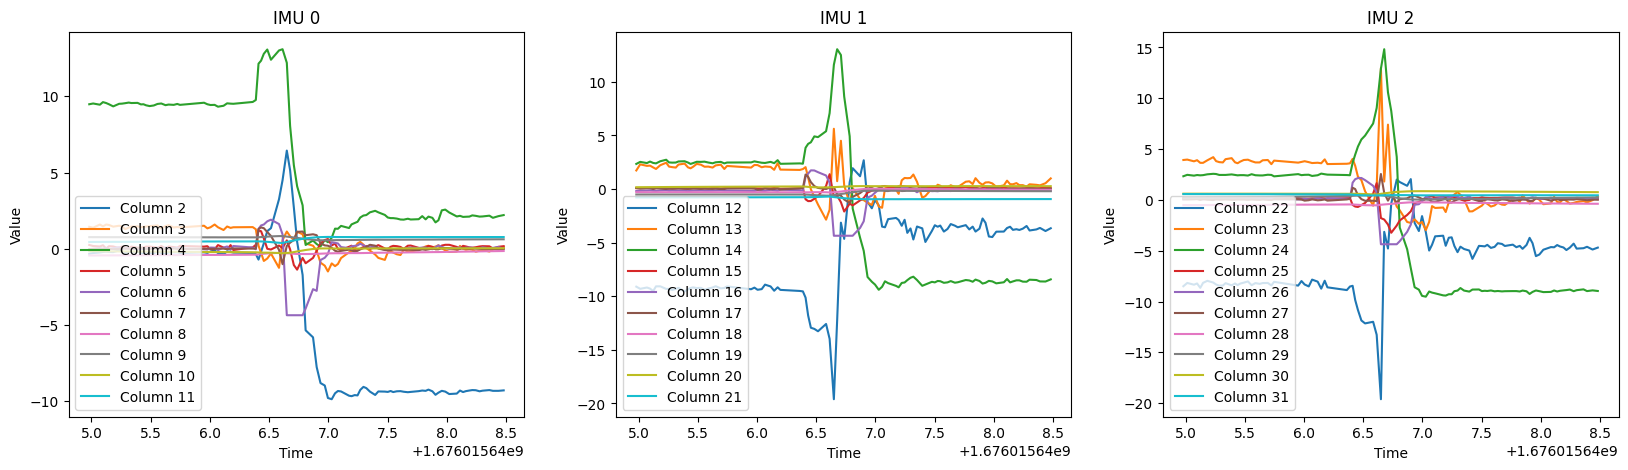

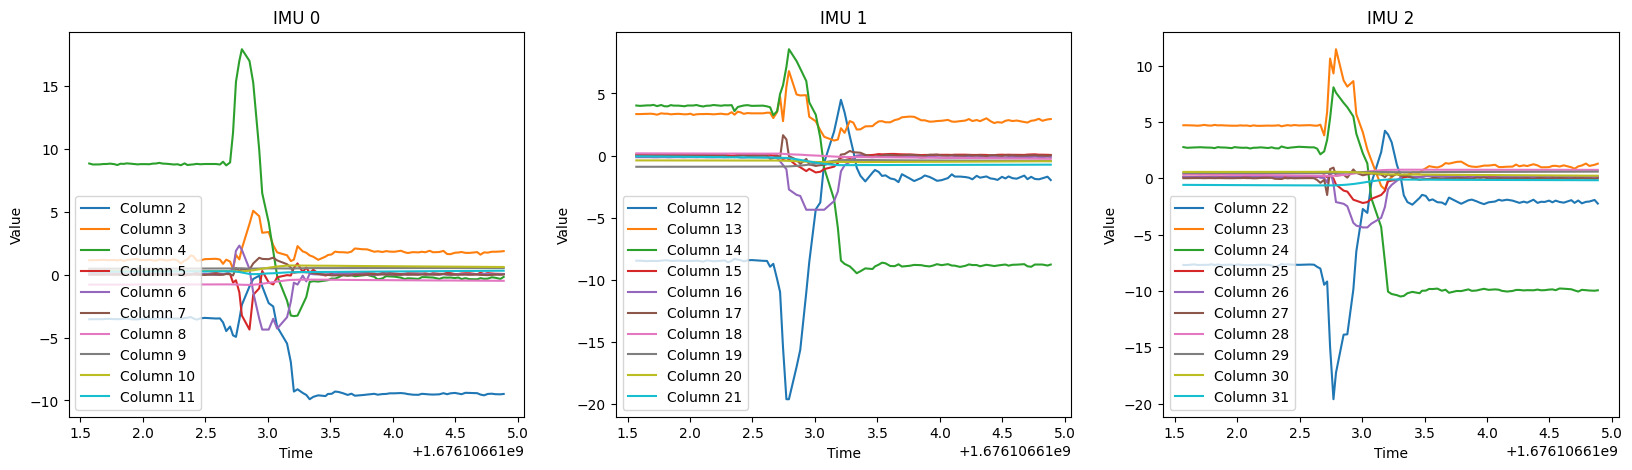

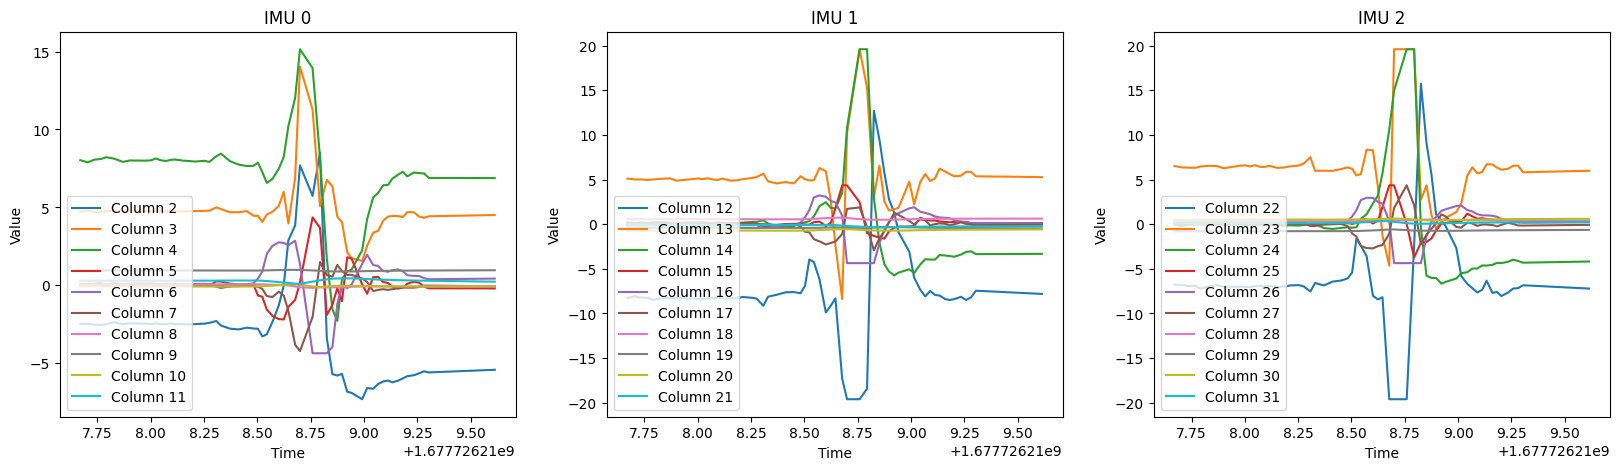

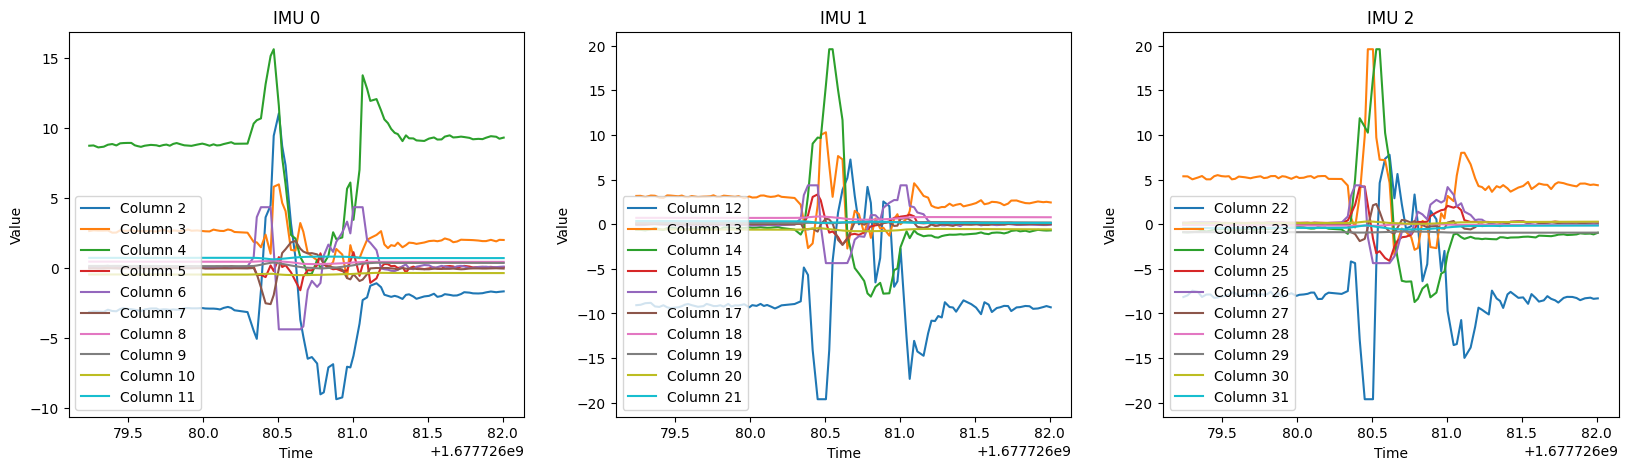

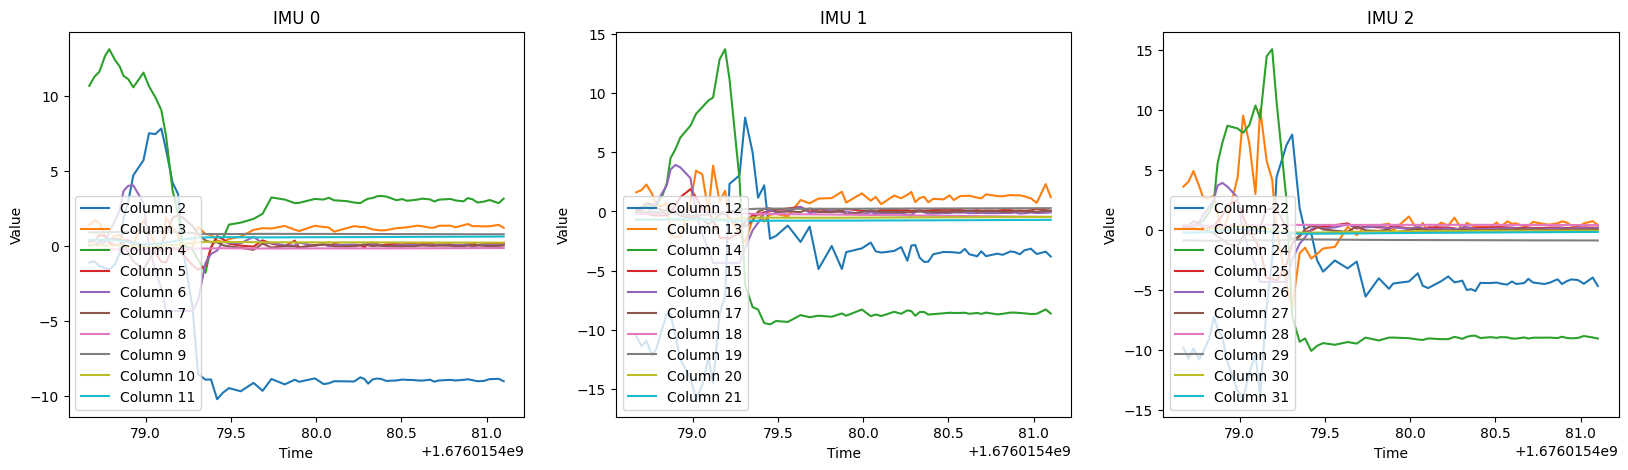

In [4]:
######################################################################
# TODO:                                                              #
# Plot 5 samples of selected hand gesture                            #
# Hint:                                                              #
#     first-column data is timestamps; column 2-11 representIMU_0    #
#     column 12-21 represent IMU_1; column 22-31 represent IMU_2     #
######################################################################
# A0279321A selection "label1: slide_up"

# Select 5 different label1 gestures
iteral_number = 0
for i in range(810):
    if data_and_labels[i]["label"].iloc[0].to_numpy() == 1 and iteral_number < 5:
        iteral_number += 1
        data = data_and_labels[i]["data"]
        label = data_and_labels[i]["label"]
        time = data.iloc[:,0].to_numpy()
        imu_0 = data.iloc[:,1:11].to_numpy()
        imu_1 = data.iloc[:,11:21].to_numpy()
        imu_2 = data.iloc[:,21:31].to_numpy()

        plt.figure(figsize=(20,5))

        # Subplot for IMU 0
        plt.subplot(1, 3, 1)
        plt.plot(time, imu_0)
        plt.title("IMU 0")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend([f"Column {index}" for index in range(2,12)], loc="lower left")

        # Subplot for IMU 1
        plt.subplot(1, 3, 2)
        plt.plot(time, imu_1)
        plt.title("IMU 1")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend([f"Column {index}" for index in range(12,22)], loc="lower left")

        # Subplot for IMU
        plt.subplot(1, 3, 3)
        plt.plot(time, imu_2)
        plt.title("IMU 2")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend([f"Column {index}" for index in range(22,32)], loc="lower left")
        plt.show()
    elif iteral_number >= 5:
        break




######################################################################
#                       END OF YOUR CODE                             #
######################################################################

In [5]:
data_format = []
for i in range(810):
    data = data_and_labels[i]["data"]
    data_format.append(data.shape[0])
max(data_format)

272

Please provide a brief analysis for the generated signals of IMUs with different locations

---


**Write your observations and analysis in this Markdown cell:**

1. For the gesture 1, we noticed that the IMU1 and IMU2 signals are barely same and co-related. Even though every time it slide up, the signal may be different, but the signal in those two IMUs are barely same.

2. It can be seen clearly that the signals in green line is co-related and barely have same pattern in three IMU sensors. In contrast, the blue signals in three IMU also related, but in a different way. The blue signals in IMU1 and IMU2 are related and barely have the same pattern, but the blue signal in IMU0 is inversely correlated with the signals of the latter two IMUs.

3. The orange line also have some turbulance in this gesture, but not dramatically compared with green and blue signals; the purple signal will will be a sinking signal under this gesture. Other signals are just barely 0 with some slight vibrate during this gesture.


---


## 2. Data processing (10 Points)
All characters are encoded in the representation of a one-hot vector, where only one unique bit of the vector is turned on for each unique character in the vocabulary.

You need to transfer the current label format into one-hot vector.

You also need to padding all data into the same data length.


In [6]:
######################################################################
# TODO:                                                              #
# Transfer the current label format into one-hot vector              #
# Hint:                                                              #
#     Feel free to use some packaghe                                 #
######################################################################
import torch

def get_one_hot_vector(label):
    """
    This function is used to get the target one-hot vector.
    """
    position = 0
    if label == 10:
        position = 7
    elif label <= 6:
        position = label
    vector = torch.zeros(8, dtype = torch.float32)
    vector[position] = 1
    return vector

for index in range(810):
    label = data_and_labels[index]["label"].iloc[0].to_numpy()
    one_hot_vector = get_one_hot_vector(label)
    data_and_labels[index]["label"] = one_hot_vector
######################################################################
#                       END OF YOUR CODE                             #
######################################################################

In [7]:
# Test of the result of one-hot vector
print(data_and_labels[20]["label"])
print(data_and_labels[25]["label"])

tensor([0., 0., 0., 0., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 0., 1., 0.])


In [8]:
# Used to see the longest data length
data_format = []
for i in range(810):
    data = data_and_labels[i]["data"]
    data_format.append(data.shape[0])
max(data_format)

272

In [9]:
import torch.nn.functional as F
data = data_and_labels[22]["data"].iloc[:, 1:45].to_numpy()
data_tensor = torch.tensor(data)
number_of_rows = data_tensor.size()[0]
p2d = (0, 0, 0, 272-number_of_rows)
new_tensor = F.pad(data_tensor, p2d, "constant", 0)
new_tensor.size()

torch.Size([272, 44])

In [10]:
######################################################################
# TODO:                                                              #
# Padding all data into the same data length                         #
# Hint:                                                              #
#     Recommended to use "zero padding" here                         #
######################################################################
# Eliminate the first row of timestamp, which is not useful for the training.
# Use `zero padding` for the data to have the same (272, 44) shape.
for index in range(810):
    data = data_and_labels[index]["data"].iloc[:, 1:45].to_numpy()
    data_tensor = torch.tensor(data, dtype = torch.float32)
    number_of_rows = data_tensor.size()[0]
    p2d = (0, 0, 0, 272-number_of_rows)
    padding_tensor = F.pad(data_tensor, p2d, "constant", 0)
    data_and_labels[index]["data"] = padding_tensor
######################################################################
#                       END OF YOUR CODE                             #
######################################################################

In [11]:
# Test of Data Processing
sample_data = data_and_labels[22]["data"]
sample_label = data_and_labels[22]["label"]
print(sample_data)
print(sample_data.size())
print(sample_label)
print(sample_label.size())

tensor([[-1.4500,  2.4700,  9.0900,  ...,  0.0000,  0.0000,  1.0000],
        [-1.4700,  2.4600,  9.1600,  ...,  0.0000,  0.0000,  1.0000],
        [-1.4300,  2.4600,  9.1100,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
torch.Size([272, 44])
tensor([1., 0., 0., 0., 0., 0., 0., 0.])
torch.Size([8])


## 3. Split dataset and build data loader (10 Points)
You will split the dataset into training and test sets (test_size=0.2) to avoid the overfitting.

You also need to build the data loader for batch training.



In [12]:
######################################################################
# TODO:                                                              #
# Split the dataset into training and test sets                      #
# build the data loader for batch training                           #
# Hint:                                                              #
#     Set test_size=0.2, batch size=32                               #
######################################################################
from torch.utils.data import DataLoader, Dataset
import torch.utils.data as data

# Creat our own dataset
class total_dataset(Dataset):
    def __init__(self, base_dataset):
        super().__init__()
        self.data_set = base_dataset

    def __len__(self):
        return len(self.data_set)

    def __getitem__(self, index):
        data = self.data_set[index]["data"]
        label = self.data_set[index]["label"]
        return data, label

# Choose 0.2 test samples randomly, split into test and train dataset
generator = torch.Generator().manual_seed(42)
dataset = total_dataset(base_dataset=data_and_labels)

test_dataset, train_dataset = data.random_split(dataset, [162, 648], generator=generator)

# Generator data loader for batch training
training_data_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
######################################################################
#                       END OF YOUR CODE                             #
######################################################################

## 4. Train LSTM for hand gestures (50 Points)
In this task, you are expected to build a Long-Short Term Memory (LSTM)  architecture for solving a problem of sequence signal and explore strategies that could further strengthen its performance.


### Loading packages

Please install the packages listed below if you haven't done so. To avoid unnecessary trouble while reproducing your code, please install the required [PyTorch](https://pytorch.org/) version.

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable

### Checking the Running Device

It is recommended to run this notebook on GPUs since that would be a much faster way to train and evaluate the model. If you have difficulties accessing GPUs with your machine, you can choose to use the free GPUs provided by [Google Colab](https://colab.research.google.com/).

In [14]:
device = None
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')
print(device)

cuda:0


### Defining the Model
LSTMs are a type of recurrent neural network (RNN) architecture commonly used in various machine learning and natural language processing tasks.

While doing so, please follow the TODOs provided below. (Refer to [torch.nn](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) for detailed instructions of building basic blocks with PyTorch.)

In [15]:
# Hyperparameters
input_size = 44
hidden_size = 64
num_layers = 2
num_classes = 8

In [33]:
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        ##############################################################################
        # TODO: Define LSTM layers and FC layers.                                    #
        ##############################################################################
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes
        self.relu_func = nn.ReLU()
        self.LSTM = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)

        self.linear_func_1 = nn.Linear(hidden_size, hidden_size//4, device=device)
        self.linear_func_2 = nn.Linear(hidden_size//4, num_classes, device=device)

        self.drop_out = nn.Dropout(p=0.3)

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    def forward(self, x):
        ##############################################################################
        # TODO: Implement forward path turning an input data to class probability.   #
        # For activation function, please use ReLU.                                  #
        ##############################################################################
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        lstm_out, (_) = self.LSTM(x, (h_0, c_0))

        func1_out = self.relu_func(self.linear_func_1(self.relu_func(lstm_out[:, -1, :])))
        func1_out_temp = self.drop_out(func1_out)
        func2_out = self.relu_func(self.linear_func_2(func1_out_temp))

        return func2_out

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
model.to(device)
print(model)

LSTMModel(
  (relu_func): ReLU()
  (LSTM): LSTM(44, 64, num_layers=2, batch_first=True)
  (linear_func_1): Linear(in_features=64, out_features=16, bias=True)
  (linear_func_2): Linear(in_features=16, out_features=8, bias=True)
  (drop_out): Dropout(p=0.3, inplace=False)
)


In [21]:
class LSTMModelNew(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModelNew, self).__init__()
        ##############################################################################
        # TODO: Define LSTM layers and FC layers.                                    #
        ##############################################################################
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes
        self.relu_func = nn.ReLU()
        self.RNN = nn.RNN(input_size, hidden_size, num_layers, nonlinearity='relu', batch_first = True)

        self.linear_func_1 = nn.Linear(hidden_size, hidden_size//4, device=device)
        self.linear_func_2 = nn.Linear(hidden_size//4, num_classes, device=device)

        self.drop_out = nn.Dropout(p=0.3)

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    def forward(self, x):
        ##############################################################################
        # TODO: Implement forward path turning an input data to class probability.   #
        # For activation function, please use ReLU.                                  #
        ##############################################################################
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        RNN_out, (_) = self.RNN(x, h_0)

        func1_out = self.relu_func(self.linear_func_1(RNN_out[:, -1, :]))
        func1_out_temp = self.drop_out(func1_out)
        func2_out = self.relu_func(self.linear_func_2(func1_out_temp))

        return func2_out


        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

model = LSTMModelNew(input_size, hidden_size, num_layers, num_classes)
model.to(device)
print(model)

LSTMModelNew(
  (relu_func): ReLU()
  (RNN): RNN(44, 64, num_layers=2, batch_first=True)
  (linear_func_1): Linear(in_features=64, out_features=16, bias=True)
  (linear_func_2): Linear(in_features=16, out_features=8, bias=True)
  (drop_out): Dropout(p=0.3, inplace=False)
)


### Training the Model

Some default settings for training.

In [34]:
criterion = torch.nn.CrossEntropyLoss()
# criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1500

In [35]:
#####################################################################
# TODO:                                                             #
# Put all training data to train the build CNN model                #
# Hint: The input data size should be (N, Cin, L)                   #
#   where N is Batch size, Cin denotes a number of channel,         #
#   and L is a length of signal sequence                            #
#   The input label size should be (N, Classes)                     #
#####################################################################
# Test loader
test_data_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Train the model
for epoch in range(num_epochs):
  print(f'EPOCH{epoch+1}:')
  oneEpochLossList_train = []
  model.train()
  for i, batch in enumerate(training_data_loader):
      inputs, labels = batch

      # Move tensors to the configured device
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Forward pass
      model.train()
      y_pred = model(inputs)
      loss = criterion(y_pred, labels)

      oneEpochLossList_train.append(loss.item())

      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  # Test the model with current parameters
  oneEpochLossList_test = []
  model.eval()
  for j, batch in enumerate(test_data_loader):
      inputs, labels = batch

      # Move tensors to the configured device
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Forward pass
      model.eval()
      y_pred = model(inputs)
      loss = criterion(y_pred, labels)

      oneEpochLossList_test.append(loss.item())
  print(f'Train Loss: {sum(oneEpochLossList_train)/len(oneEpochLossList_train)}, Evaluation Loss: {sum(oneEpochLossList_test)/len(oneEpochLossList_test)}')

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

# Save the trained model
torch.save(model.state_dict(), './model_lstm_lstm.pt')

EPOCH1:
Train Loss: 2.0322753190994263, Evaluation Loss: 2.0360596577326455
EPOCH2:
Train Loss: 2.0133630832036338, Evaluation Loss: 1.9973241885503132
EPOCH3:
Train Loss: 2.006247395560855, Evaluation Loss: 1.9227269291877747
EPOCH4:
Train Loss: 2.0047011205128262, Evaluation Loss: 2.0517605543136597
EPOCH5:
Train Loss: 2.0059137514659335, Evaluation Loss: 2.0517075856526694
EPOCH6:
Train Loss: 2.003828991027105, Evaluation Loss: 2.06512584288915
EPOCH7:
Train Loss: 2.007073930331639, Evaluation Loss: 2.0790262818336487
EPOCH8:
Train Loss: 2.0165373257228305, Evaluation Loss: 2.0640708208084106
EPOCH9:
Train Loss: 2.0048484972545078, Evaluation Loss: 2.020806690057119
EPOCH10:
Train Loss: 2.0126872460047402, Evaluation Loss: 2.057538906733195
EPOCH11:
Train Loss: 2.0065313691184636, Evaluation Loss: 2.039191166559855
EPOCH12:
Train Loss: 1.9976370334625244, Evaluation Loss: 2.0548190673192344
EPOCH13:
Train Loss: 2.0090448515755788, Evaluation Loss: 2.0069830814997354
EPOCH14:
Train L

### Evaluate the Model

Evaluate the performance of the trained LSTM model in test data set

In [36]:
assert os.path.exists('./model_lstm_lstm.pt'), 'train the model first'
# Load the trained model
model.load_state_dict(torch.load('./model_lstm_lstm.pt', map_location=torch.device('cpu')))
model.to(device)
model.eval()

#####################################################################
# TODO:  Print the predicted label of test set  (0-7)               #
# Put all test data to verify the preformance of trained LSTM model #
#####################################################################
original_labels = []
output_labels = []
total = 0
matched = 0
for i, vdata in enumerate(training_data_loader):
    data, label = vdata
    data, label = data.to(device), label.to(device)
    output = model(data)
    print("###############################################")
    original_labels.append(torch.argmax(label, dim=1))
    output_labels.append(torch.argmax(output, dim=1))
    print(torch.argmax(label, dim=1))
    print(torch.argmax(output, dim=1))

for original, output in zip(original_labels, output_labels):
    for i in range(original.size(dim=0)):
        if original[i] == output[i]:
            matched += 1
            total += 1
        else:
            total += 1

# Calculate the rate of True values
true_rate = matched/total

print(true_rate)

#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

###############################################
tensor([0, 3, 2, 6, 4, 6, 4, 3, 0, 1, 6, 1, 3, 5, 6, 6, 5, 0, 2, 6, 0, 3, 6, 1,
        4, 3, 0, 0, 2, 4, 3, 4], device='cuda:0')
tensor([0, 4, 2, 6, 4, 6, 4, 4, 0, 1, 6, 1, 4, 5, 6, 6, 5, 0, 2, 6, 0, 4, 6, 1,
        4, 4, 0, 0, 2, 4, 4, 4], device='cuda:0')
###############################################
tensor([5, 5, 2, 0, 4, 6, 2, 6, 2, 3, 0, 5, 4, 3, 4, 6, 3, 3, 2, 2, 4, 5, 2, 6,
        3, 0, 1, 0, 4, 6, 3, 0], device='cuda:0')
tensor([5, 5, 2, 0, 4, 6, 2, 6, 2, 4, 0, 5, 4, 4, 4, 6, 4, 4, 2, 2, 4, 5, 2, 6,
        4, 0, 1, 0, 4, 6, 4, 0], device='cuda:0')
###############################################
tensor([6, 0, 0, 0, 3, 1, 6, 0, 0, 3, 2, 0, 6, 0, 2, 4, 6, 2, 6, 2, 2, 3, 1, 4,
        3, 3, 5, 6, 4, 0, 6, 6], device='cuda:0')
tensor([6, 0, 0, 0, 4, 1, 6, 0, 0, 4, 2, 0, 6, 0, 2, 4, 6, 2, 6, 2, 2, 4, 1, 4,
        4, 4, 5, 6, 4, 0, 6, 6], device='cuda:0')
###############################################
tensor([1, 4, 5, 4, 3, 0, 3,

### 5. Refining the Model (20 Points)

Although the previous model has achieved fair classification results, the test error is still remaining room for further improvement. There are lots of methods to refine your model, such as **modifying the network architecture** (e.g., making your network deeper), **optimizing the learning strategy** (e.g., optimizer, loss function), and **tuning the hyperparameters** (e.g., learning rate, training iterations), etc. Please try <font color=red> at least **TWO** </font>different methods to improve your model's performance, and discuss why these changes can work. Design and conduct your own experiments using the coding cell below, and present your experimental results and analysis in a decent way (e.g., drawing some neat figures/tables can help to convey your thoughts effectively).

---


**Write your observations and analysis in this Markdown cell:**

The base line model is 1 LSTM model with 1 fully connected layer.
In the privous base line, the accuracy can be achieved `0.879` in `training set` and `0.808` in `test set`.

> ## Method 1
**Deeper Network:** With 2 Fully Connected Layer and a drop out between them, we achieved a `0.997` accuracy in `training set` and `0.944` in `test set`. This model is save in the `model_lstm_2fc.pt` file.
>>**REASON:** A deeper network can fit more features and good for the prediction, and a drop out layer can avoid our model to be overfitting in the training process.


> ## Method 2
**Change Learning Rate:** The base line model use 0.001 learning rate for training, we change the learning rate to 0.003 and others remain the same. The model saved in the `model_lstm_1fc003.pt`. We achieved `1.0` accuracy in the `training set` and `0.9629` accuracy in the `test set`.
>>**REASON:** When the learning rate is relatively low, the learning process may not hit the best position in 1000 epoches. But when we increase our learning rate, we can reach the optimal point more easily. It is also important to note that the learning rate should not be too large or we may have problems with learning bounces.



---

### *6. Explore other structures (additional 10 Points)*

*In addition to LSTM, you can also use other structures based on RNN to explore if such structures can give you a better performance *


---


**Write your observations and analysis in this Markdown cell:**

---


